# Task 2

# Import data

Import useful packages and source code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import neural network
import sys
sys.path.insert(0, '../src')

from Task_2.activation_layer import ActivationLayer
from Task_2.adam_optimizer import AdamOptimizer
from Task_2.layer import Layer
from Task_2.neural_network import NeuralNetwork

2022-12-16 15:44:00.132008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load data:

In [2]:
# Import data and targets
digits = load_digits()
X = digits.data  # type: ignore
y = digits.target  # type: ignore

# Apply StandardScaler to data
st = StandardScaler()
X = st.fit_transform(X)

# Split in train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=65,train_size=0.8)

# Apply one-hot enconding to the training targets
y_train = to_categorical(y_train)

The dataset is composed by hand-written digits, each associated with theis real value. 

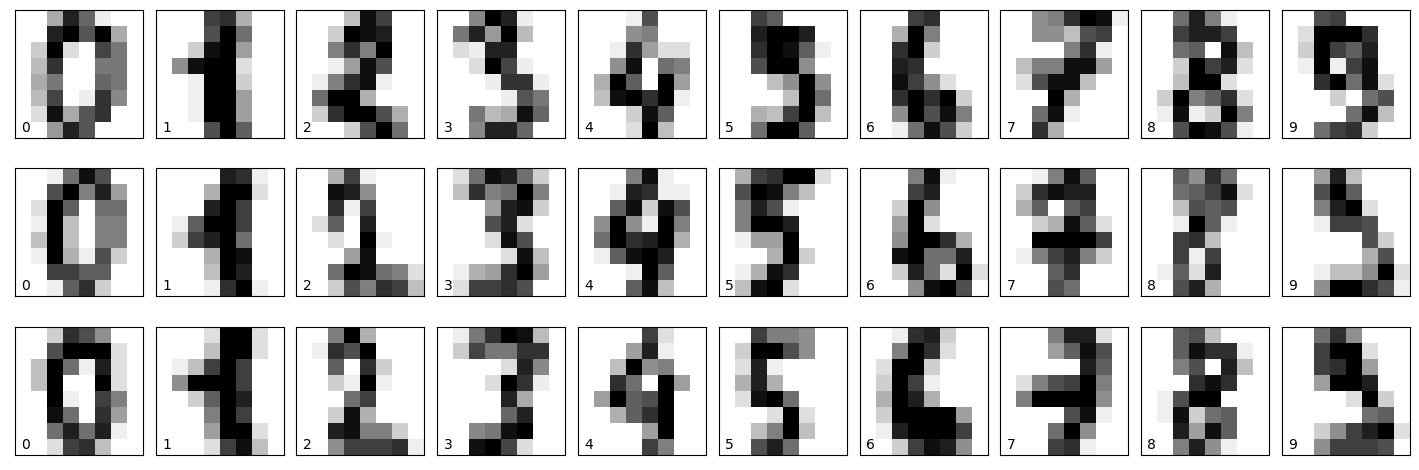

In [3]:
fig, axes = plt.subplots(3,10, figsize=(18, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):  # type: ignore
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')  # type: ignore
    ax.text(0.05, 0.05, str(digits.target[i]),  # type: ignore
            transform=ax.transAxes, color='black')
    
#plt.savefig("../results/Task2/digits")    

# Neural Networks

## First neural network

In [13]:
# Define the neural network with:
# - learning_rate
# - max_epochs
# - type_loss: "cross_entropy" for classification and "mse" for regression
NN = NeuralNetwork(learning_rate = 0.001, max_epochs = 150, type_loss = "cross_entropy")

# Add input layer
NN.add(Layer(X.shape[1])) 

# Add hidden layer with 60 nodes, dropout of 0.5 and sigmoid activation function
NN.add(Layer(80, dropout_percentile=0.5, activation_function=ActivationLayer("sigmoid"))) 

# Add output layer, dropout of 0.5 and softmax activation function
NN.add(Layer(y_train.shape[1], dropout_percentile=0.5, activation_function=ActivationLayer("softmax")))

# Initialise the neural network (initialise weights and biases)
NN.build_network()

# Fit the model with two approaches:

# -- batch gradient descent --
L_batch = NN.fit_batch(X_train, y_train, toll = 0.001)

y_pred_batch = NN.predict(X_test) # predict values
y_batch = np.argmax(y_pred_batch,axis = 1)

print("Accuracy batch gradient descent: %.3f" %accuracy_score(y_batch,y_test))

# -- mini batches --
L_mini = NN.fit_mini_batch(X_train,y_train, toll = 0.001, n_mini_batches = 10) # pass the number of batches to consider

y_pred_mini = NN.predict(X_test)

y_mini = np.argmax(y_pred_mini,axis = 1)

print("Accuracy mini batches: %.3f" %accuracy_score(y_mini,y_test))

#cm = confusion_matrix(y,y_test)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2","3","4","5","6","7","8","9"])
#disp.plot()

Accuracy batch gradient descent: 0.619
Accuracy mini batches: 0.572


The first evidence is about the lerning rate $\alpha$. In fact, it has been tested that a low learning rate is necessary in order to prevent the the loss the keep increasing

Learning rate: 0.0010 - Accuracy: 0.581
Learning rate: 0.0005 - Accuracy: 0.622
Learning rate: 0.0001 - Accuracy: 0.647


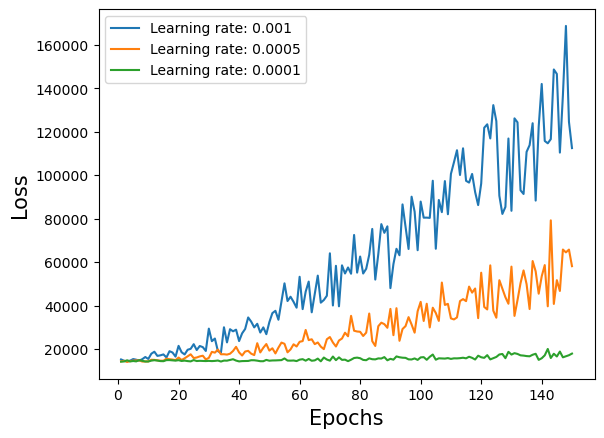

In [49]:
# Neural network with 1 hidden layer (80 nodes), sigmoid and softmax activation functions

# The learning rate tested are:
learning_rate_range = [0.001, 0.0005, 0.0001]

fig, ax = plt.subplots()

for lr in learning_rate_range:

    NN = NeuralNetwork(learning_rate = lr, max_epochs = 150, type_loss = "cross_entropy")
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(90, dropout_percentile=0.5, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.5, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()
    L = NN.fit_batch(X_train,y_train, toll = 0.001) # set toll as tollerance parameter to stop the search
    y_pred = NN.predict(X_test)
    y = np.argmax(y_pred,axis = 1)
 
    print("Learning rate: %.4f - Accuracy: %.3f" %(lr,accuracy_score(y,y_test)))

    ax.plot(range(1,len(L)+1),L, label="Learning rate: {}".format(lr))

ax.set_xlabel("Epochs", fontsize = 15)
ax.set_ylabel("Loss", fontsize = 15)
ax.legend();

#plt.savefig("../results/Task2/l_rates")

The need to use a small learning rate is therefore evident. Accuracy is not particularly affected by this value, with values fluctuating around 0.6. But the loss, as can be seen from the figure above, increases exponentially when a larger learning rate is used. The threshold value for correct loss performance has been identified at around 0.0001.

## Sensitivity to hyper-parameters

### Sensitivity to number of nodes

  1 HIDDEN LAYER NEURAL NETWORK     
____________________________________
Number of nodes: 10, Accuracy: 0.279
Number of nodes: 15, Accuracy: 0.281
Number of nodes: 20, Accuracy: 0.320
Number of nodes: 25, Accuracy: 0.324
Number of nodes: 30, Accuracy: 0.418
Number of nodes: 40, Accuracy: 0.419
Number of nodes: 50, Accuracy: 0.451
Number of nodes: 60, Accuracy: 0.519
Number of nodes: 70, Accuracy: 0.505
Number of nodes: 80, Accuracy: 0.532
Number of nodes: 90, Accuracy: 0.624
Number of nodes: 100, Accuracy: 0.578


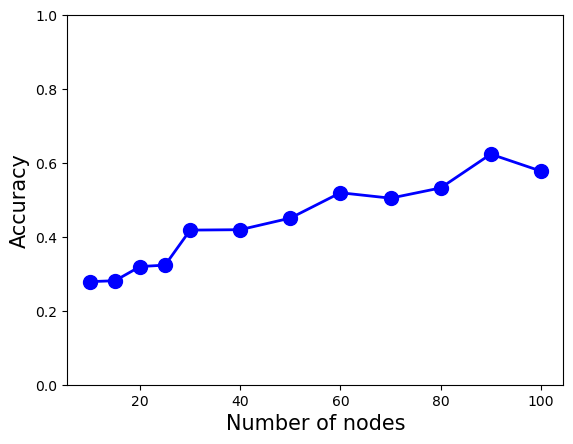

In [35]:
nodes = [10,15,20,25,30,40,50,60,70,80,90,100]
acc_nodes = []

print("====================================")
print("  1 HIDDEN LAYER NEURAL NETWORK     ")
print("____________________________________")
for test_nodes in nodes:
    
    acc_test = []
    
    for _ in range(10): # repeat 10 times
    
        NN = NeuralNetwork(learning_rate = 0.0001, max_epochs = 150, type_loss = "cross_entropy")
        NN.add(Layer(X.shape[1])) # Add input layer
        NN.add(Layer(test_nodes, dropout_percentile=0.5, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
        NN.add(Layer(y_train.shape[1], dropout_percentile=0.5, activation_function=ActivationLayer("softmax"))) # Add output layer
        NN.build_network()

        L = NN.fit_mini_batch(X_train,y_train, toll = 0.001,n_mini_batches = 1)

        y_pred = NN.predict(X_test)
        y = np.argmax(y_pred,axis = 1)
        
        acc_test.append(accuracy_score(y,y_test))
        
    print("Number of nodes: %.0f, Accuracy: %.3f" %(test_nodes,np.mean(acc_test)))
    
    acc_nodes.append(np.mean(acc_test))
    
print("====================================")  

# Plot the trends
fig, ax = plt.subplots()
ax.plot(nodes, acc_nodes, "b", marker= "o",linewidth = 2, markersize = 10)
ax.set_xlabel("Number of nodes",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)
ax.set_ylim(0,1);

#plt.savefig("../results/Task2/acc_nodes")

### Number of mini-batches

  1 HIDDEN LAYER NEURAL NETWORK     
____________________________________
Number of mini batches: 1, Accuracy: 0.572
Number of mini batches: 5, Accuracy: 0.559
Number of mini batches: 10, Accuracy: 0.604
Number of mini batches: 20, Accuracy: 0.618
Number of mini batches: 30, Accuracy: 0.604
Number of mini batches: 40, Accuracy: 0.652
Number of mini batches: 50, Accuracy: 0.678


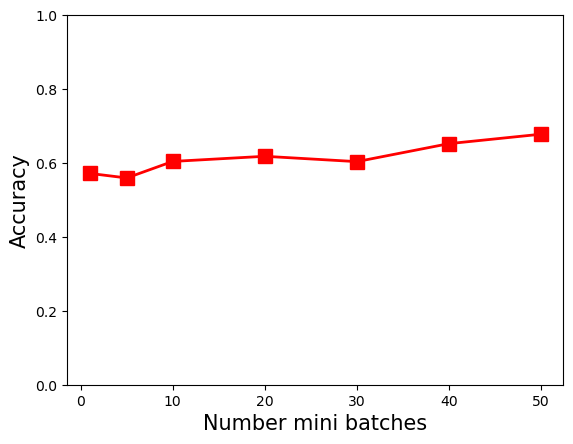

In [36]:
mini_batches = [1,5,10,20,30,40,50]
acc_batches = []

print("====================================")
print("  1 HIDDEN LAYER NEURAL NETWORK     ")
print("____________________________________")
for test_mini_batches in mini_batches:
    
    acc_test = []
    
    for _ in range(10): # repeat 10 times
        
        NN = NeuralNetwork(learning_rate = 0.0001, max_epochs = 150, type_loss = "cross_entropy")
        NN.add(Layer(X.shape[1])) # Add input layer
        NN.add(Layer(90, dropout_percentile=0.5, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
        NN.add(Layer(y_train.shape[1], dropout_percentile=0.5, activation_function=ActivationLayer("softmax"))) # Add output layer
        NN.build_network()

        L = NN.fit_mini_batch(X_train,y_train, toll = 0.001,n_mini_batches = test_mini_batches) # set toll as tollerance parameter to stop the search

        y_pred = NN.predict(X_test)

        y = np.argmax(y_pred,axis = 1)
            
        acc_test.append(accuracy_score(y,y_test))

    print("Number of mini batches: %.0f, Accuracy: %.3f" %(test_mini_batches,np.mean(acc_test)))
    
    acc_batches.append(np.mean(acc_test))
    
print("====================================")

# Plot the trends
fig, ax = plt.subplots()
ax.plot(mini_batches, acc_batches, "r", marker= "s",linewidth = 2, markersize = 10)
ax.set_xlabel("Number mini batches",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)
ax.set_ylim(0,1);

#plt.savefig("../results/Task2/acc_nodes")

### Dropout percentages

  1 HIDDEN LAYER NEURAL NETWORK     
____________________________________
Dropout percentage: 0.10, Accuracy: 0.109
Dropout percentage: 0.30, Accuracy: 0.365
Dropout percentage: 0.50, Accuracy: 0.649
Dropout percentage: 0.70, Accuracy: 0.784
Dropout percentage: 0.90, Accuracy: 0.824
Dropout percentage: 1.00, Accuracy: 0.827


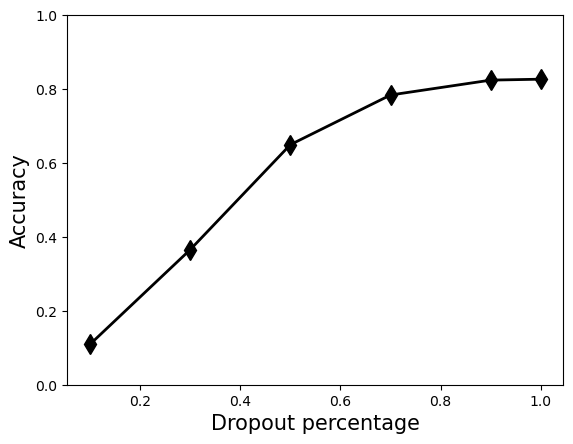

In [42]:
drop = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
acc_drop = []

print("====================================")
print("  1 HIDDEN LAYER NEURAL NETWORK     ")
print("____________________________________")
for test_drop in drop:
    
    acc_test = []
    
    for _ in range(10): # repeat 10 times
        
        NN = NeuralNetwork(learning_rate = 0.0001, max_epochs = 150, type_loss = "cross_entropy")
        NN.add(Layer(X.shape[1])) # Add input layer
        NN.add(Layer(90, dropout_percentile=test_drop, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
        NN.add(Layer(y_train.shape[1], dropout_percentile=test_drop, activation_function=ActivationLayer("softmax"))) # Add output layer
        NN.build_network()

        L = NN.fit_mini_batch(X_train,y_train, toll = 0.001,n_mini_batches = 50) # set toll as tollerance parameter to stop the search

        y_pred = NN.predict(X_test)
        y = np.argmax(y_pred,axis = 1)
            
        acc_test.append(accuracy_score(y,y_test))

    print("Dropout percentage: %.2f, Accuracy: %.3f" %(test_drop,np.mean(acc_test)))
    
    acc_drop.append(np.mean(acc_test))
    
print("====================================")

# Plot the trends
fig, ax = plt.subplots()
ax.plot(drop, acc_drop, "k", marker= "d",linewidth = 2, markersize = 10)
ax.set_xlabel("Dropout percentage",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)
ax.set_ylim(0,1);

plt.savefig("../results/Task2/acc_drop")

## Final design

After familiarising with the main degrees of freedom available for tuning neural networks, the next part of the analysis focused on the development of different architectures to try to obtain the best values in terms of accuracy and loss performance.

Accuracy: 0.639


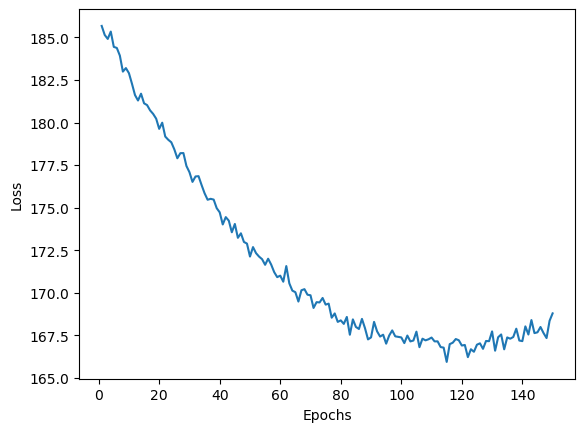

In [53]:
acc = []
L_range = np.zeros((10,150))

for ind in range(10):

    NN = NeuralNetwork(learning_rate = 0.00001, max_epochs = 150, type_loss = "cross_entropy", optimizer=AdamOptimizer())
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(90, dropout_percentile=0.8, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.85, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()

    L = NN.fit_mini_batch(X_train,y_train, toll = 0.01, n_mini_batches = 50)
    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)
    
    acc.append(accuracy_score(y,y_test))
    L_range[ind] = L
    
print("Accuracy: %.3f" %np.mean(acc))

L_plot = np.mean(L_range,axis=0)
fig, ax = plt.subplots()
ax.plot(range(1,len(L_plot)+1),L_plot)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

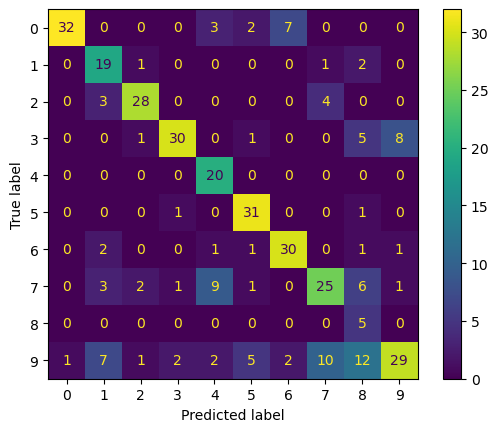

In [59]:
cm = confusion_matrix(y,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0","1","2","3","4","5","6","7","8","9"])
disp.plot()

Improve accuracy:

Accuracy: 0.587


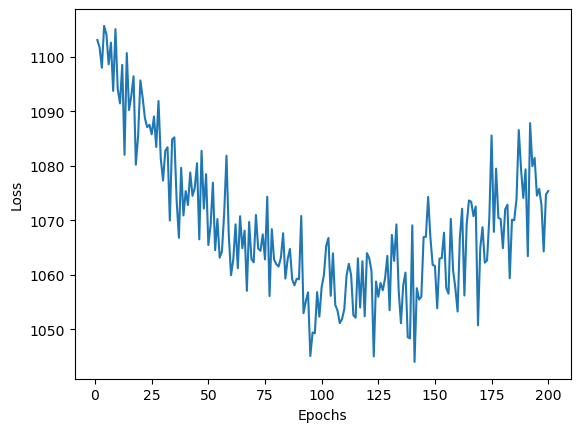

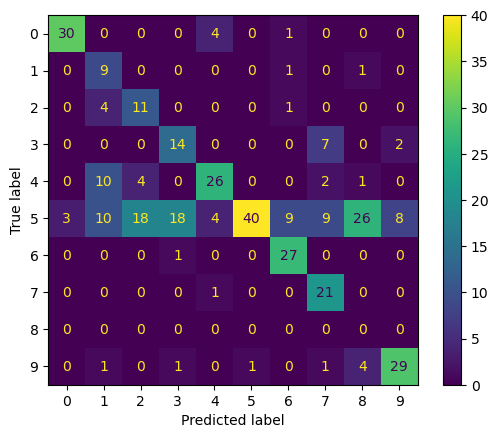

In [51]:
acc = []
epochs = 200
trials = 5

L_range = np.zeros((trials,epochs))

for ind in range(trials):

    NN = NeuralNetwork(learning_rate = 0.00003, max_epochs = epochs, type_loss = "cross_entropy",optimizer=AdamOptimizer())
    NN.add(Layer(X.shape[1])) # Add input layer
    NN.add(Layer(100, dropout_percentile=0.7, activation_function=ActivationLayer("sigmoid"))) # Add hidden layer
    NN.add(Layer(y_train.shape[1], dropout_percentile=0.85, activation_function=ActivationLayer("softmax"))) # Add output layer
    NN.build_network()

    L = NN.fit_mini_batch(X_train,y_train, toll = 0.01, n_mini_batches = 10) # 10: set toll as tollerance parameter to stop the search

    y_pred = NN.predict(X_test)

    y = np.argmax(y_pred,axis = 1)
    
    acc.append(accuracy_score(y,y_test))
    L_range[ind] = L
    
print("Accuracy: %.3f" %np.mean(acc))

L_plot = np.mean(L_range,axis=0)
fig, ax = plt.subplots()
ax.plot(range(1,len(L_plot)+1),L_plot)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

cm = confusion_matrix(y,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0","1","2","3","4","5","6","7","8","9"])
disp.plot()